In [1]:
# import dependencies
import json
import pandas as pd
import numpy as np

In [2]:
file_dir = '/Users/damonphillips/Desktop/bootcamp/week_8_ETL/'

In [3]:
path = f'{file_dir}movies_metadata.csv'

In [4]:
path

'/Users/damonphillips/Desktop/bootcamp/week_8_ETL/movies_metadata.csv'

In [5]:
# 8.2.2 Extract the Kaggle Data
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv')
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

/var/folders/_y/vb34tnbs47j4ht4n0635n_6w0000gn/T/ipykernel_14902/2752268769.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv')


In [6]:
f'{file_dir}/ratings.csv'
#f'{file_dir}/movies_metadata.csv'


'/Users/damonphillips/Desktop/bootcamp/week_8_ETL//ratings.csv'

In [7]:
# kaggle_metadata.head()
len(kaggle_metadata)
# kaggle_metadata.tail()
kaggle_metadata.sample(n=5) # sample method!! tip!

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
33523,False,NaN,0,[],NaN,92586,tt0053597,fr,Un amore a Roma,NaN,...,1960-11-24,0.0,0.0,[],Released,NaN,Love in Rome,False,0.0,0.0
44961,False,NaN,0,[],NaN,175910,tt0348816,en,7 Days in September,A documentary about behind the scenes and what...,...,2002-09-06,0.0,94.0,[],Released,Documentary,7 Days in September,False,8.0,1.0
31342,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,99883,tt0053724,es,El cochecito,El Cochecito is a 1960 Spanish black comedy fi...,...,1960-11-03,0.0,85.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,The Wheelchair,False,7.1,8.0
21999,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,250610,tt0109498,en,The Crew,Five passengers embark on a Bahamas pleasure c...,...,1994-10-01,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Crew,False,4.0,1.0
11080,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,19676,tt0439008,en,These Girls,Based on the humorously edgy play by Vivienne ...,...,2005-09-10,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,These Girls,False,4.4,13.0


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
# ratings

### 8.3.12 Clean the Kaggle Data. 10/4/22 PM

In [9]:
# Check that all of the columns from the .csv came in as the correct data types.
kaggle_metadata.dtypes


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
# Need to convert data types of more columns than just these 4.

In [ ]:
kaggle_metadata['adult'].value_counts()

In [ ]:
# Remove some bad data.

In [ ]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True', 'False'])]

In [ ]:
# following code will keep rows where the adult column is False, and then drop the adult column.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [ ]:
kaggle_metadata['video'].value_counts()

In [ ]:
# Convert Data Types

In [ ]:
# code creates the Boolean column we want. We just need to assign it back to video.
kaggle_metadata['video'] == 'True'


In [ ]:
# assing it back to video ??
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'


In [ ]:
# any data that cant be converted to numbers?
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')


In [ ]:
# 
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [ ]:
#  Ratings data using info method
ratings.info(null_counts=True)

In [ ]:
# specify in to_datetime() that the origin is 'unix' and the time unit is seconds.
pd.to_datetime(ratings['timestamp'], unit='s')


In [ ]:
# The output above looks reasonable, so assign it to the timestamp column.
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [ ]:
# Finally, we look at the statistics of the actual ratings and see if 
# there are any glaring errors. A quick way to do this is a histogram 
# of the rating distributions, and use the describe() method to print.

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

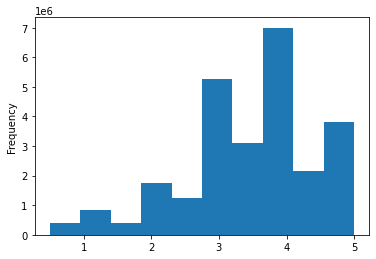

In [10]:
# histogram of data points shown 
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

### 8.4.1 Merge Wikipedia and Kaggle Metadata

In [ ]:
# add/commit/push

In [ ]:
# 8.4.2 attempt to get thru module.

In [14]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count()

In [15]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1)

In [16]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')

In [17]:
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

In [18]:
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

NameError: name 'movies_df' is not defined

In [11]:
# print out 
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])


NameError: name 'wiki_movies_df' is not defined

In [ ]:
# print(wiki_movies)

In [12]:
movies_df[['title_wiki','title_kaggle']]

NameError: name 'movies_df' is not defined

In [13]:
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

NameError: name 'movies_df' is not defined